In [714]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    OrdinalEncoder, 
    StandardScaler, 
    OneHotEncoder, 
    MinMaxScaler
)

# Models
from sklearn.linear_model import (
    LinearRegression, 
    Ridge
)

from sklearn.ensemble import (
    RandomForestRegressor, 
    GradientBoostingRegressor, 
    VotingRegressor, 
    StackingRegressor
)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Model Selection
from sklearn.model_selection import train_test_split


# Data Analyse

In [715]:
train_df = pd.read_csv('home-data-for-ml-course/train.csv')
test_df = pd.read_csv('home-data-for-ml-course/test.csv')

In [716]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [717]:
train_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [718]:
train_df.dtypes[train_df.dtypes != 'object']

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

/var/folders/yg/cwb_z5jd7td2v3xzmnb8rpc40000gn/T/ipykernel_23430/3061234625.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i)


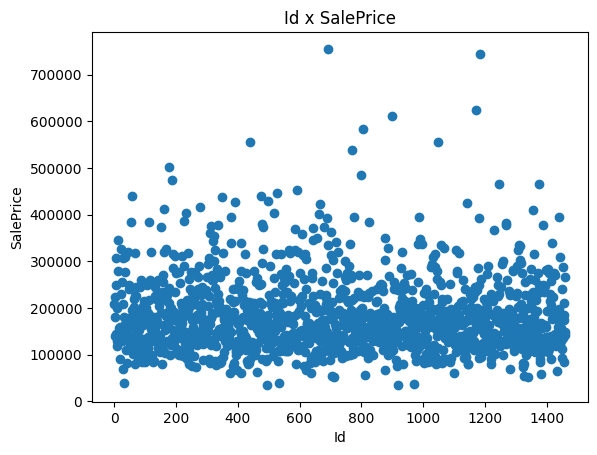

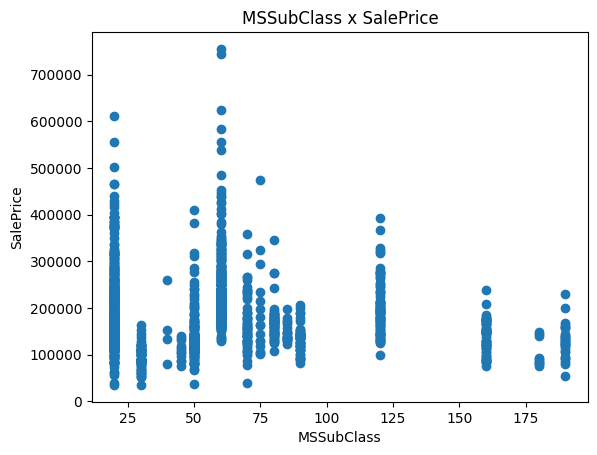

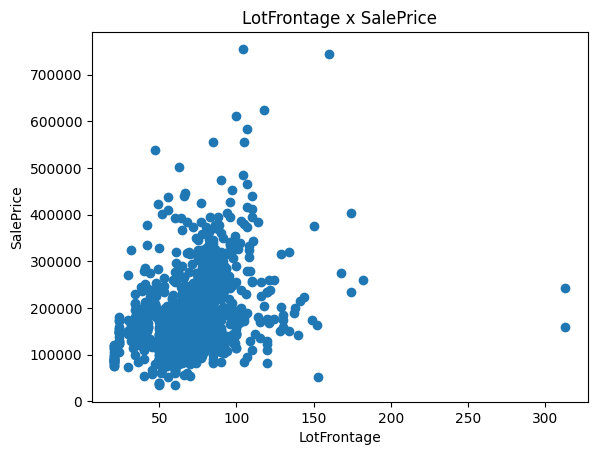

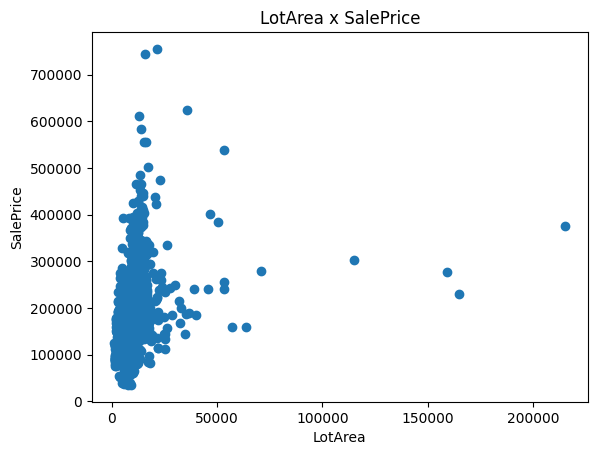

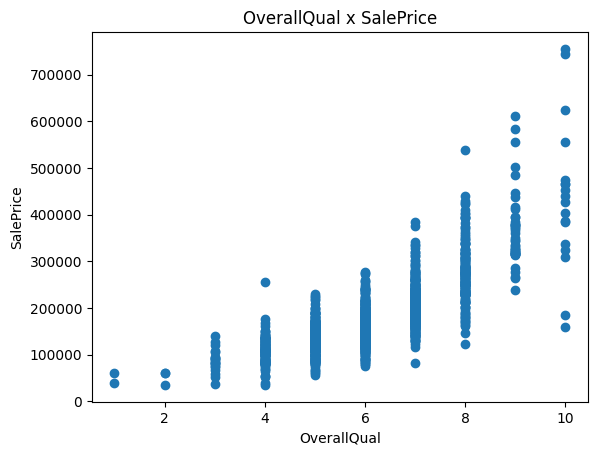

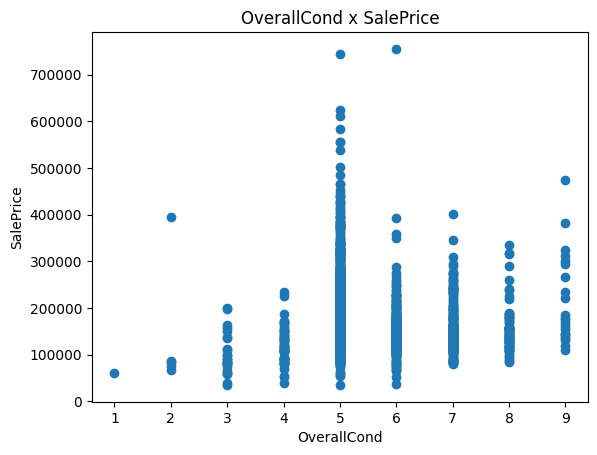

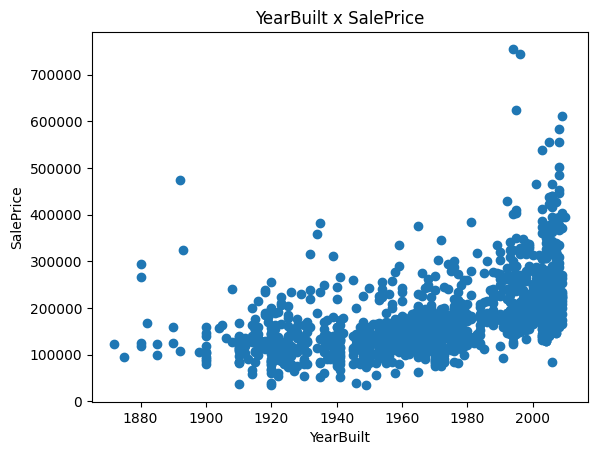

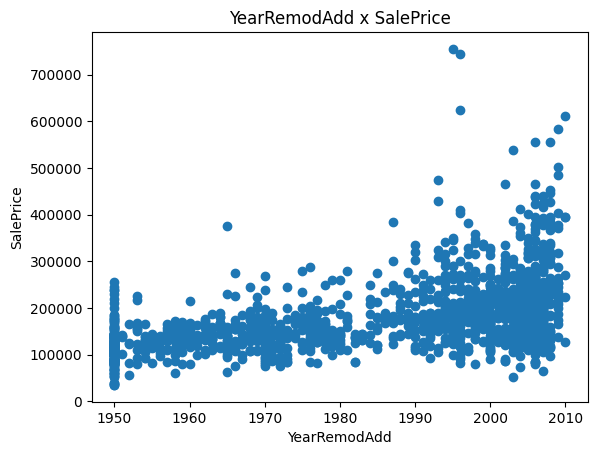

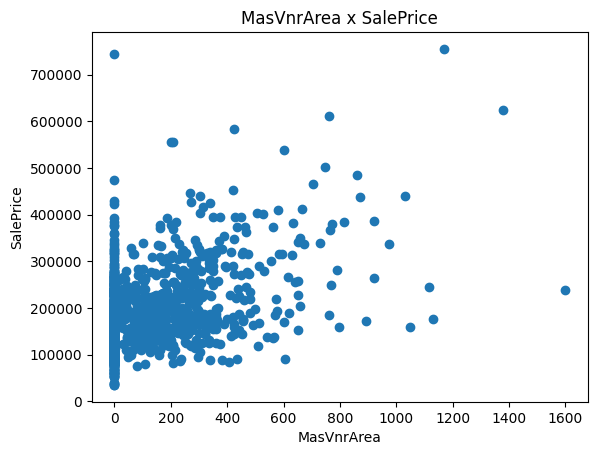

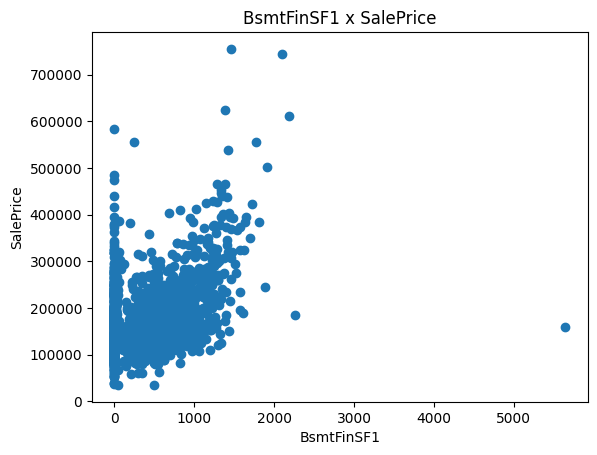

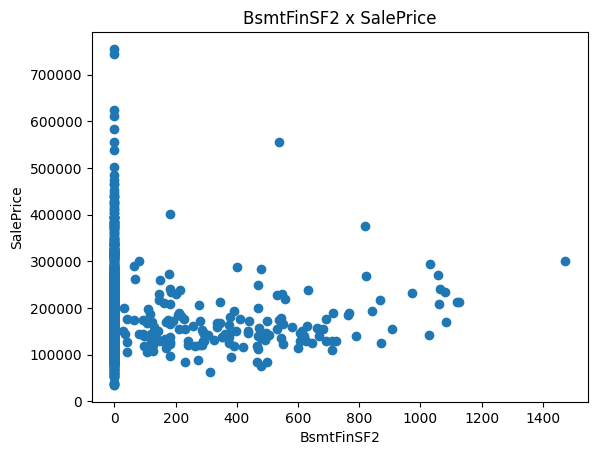

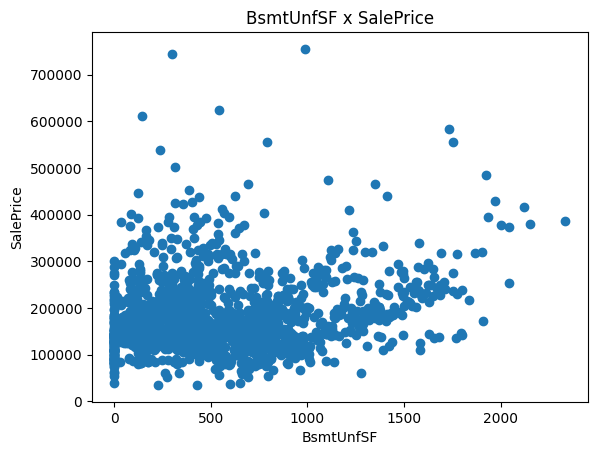

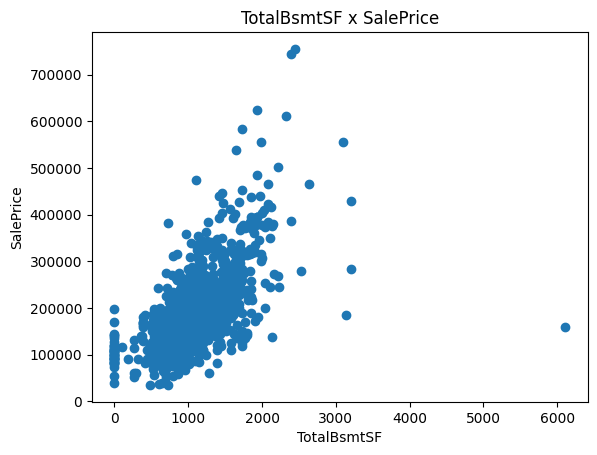

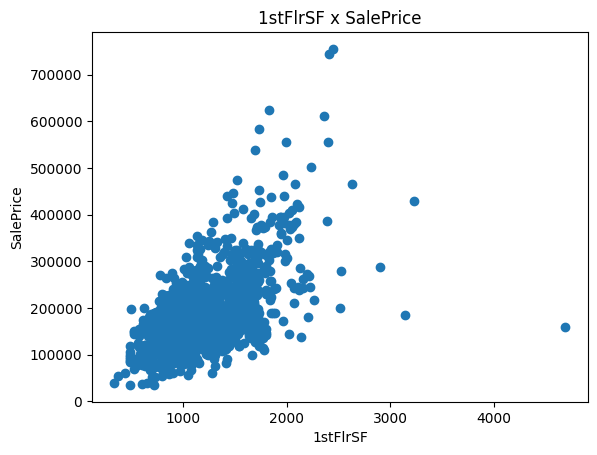

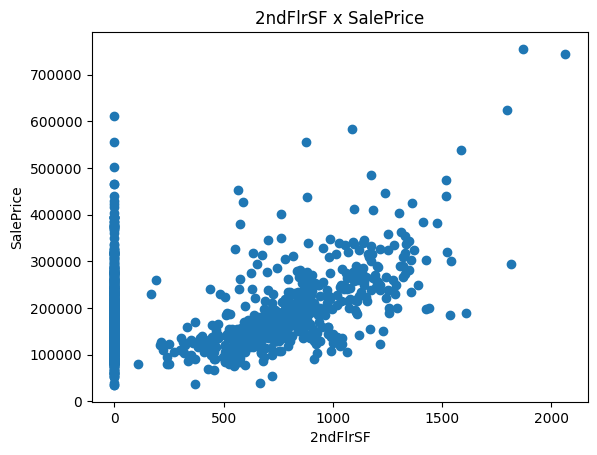

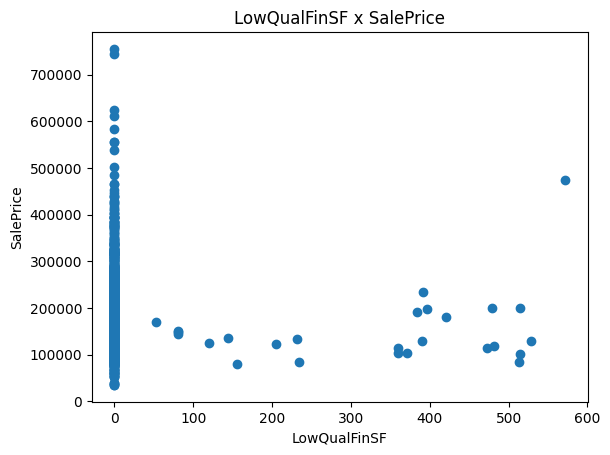

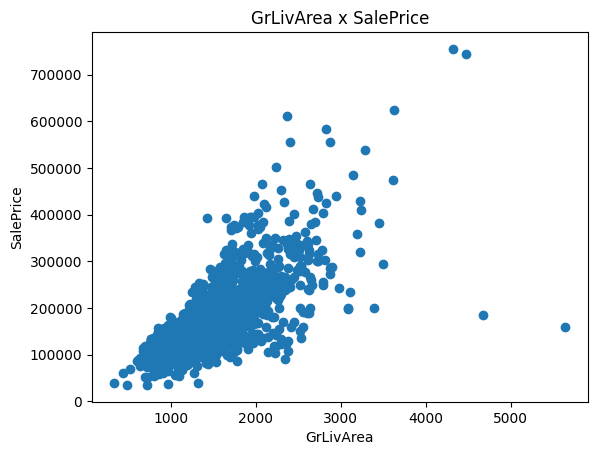

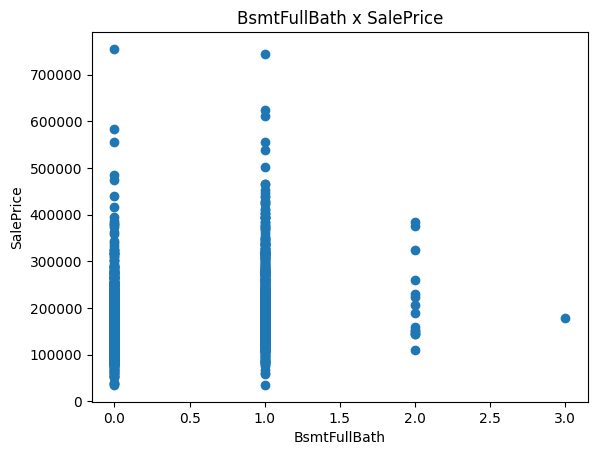

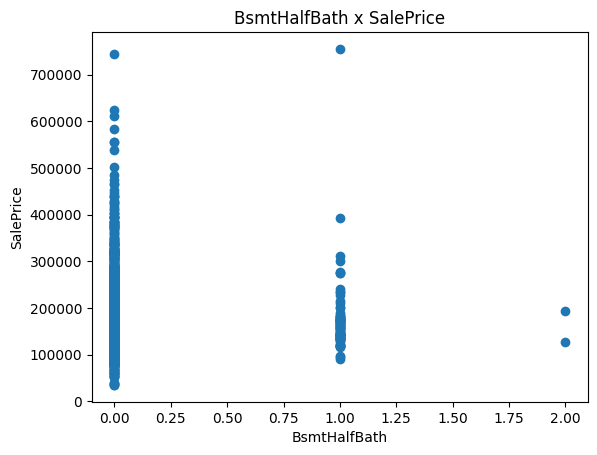

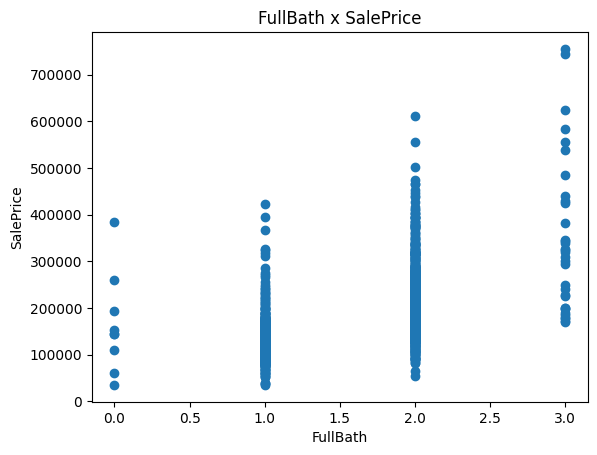

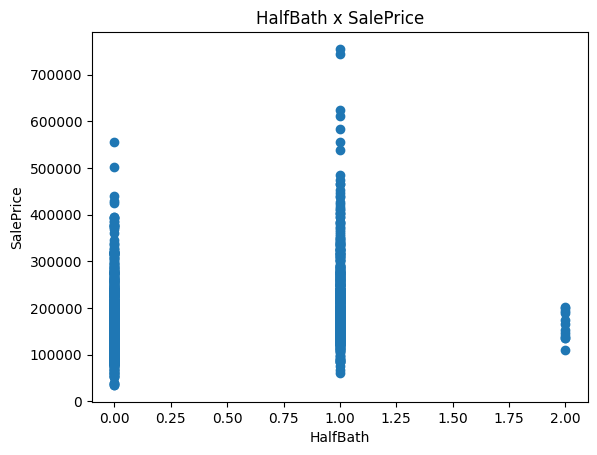

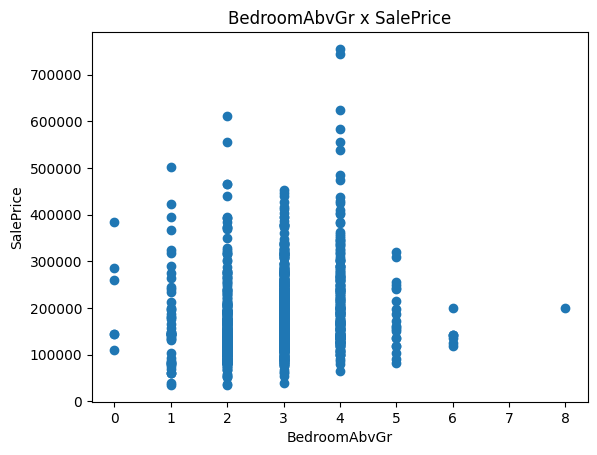

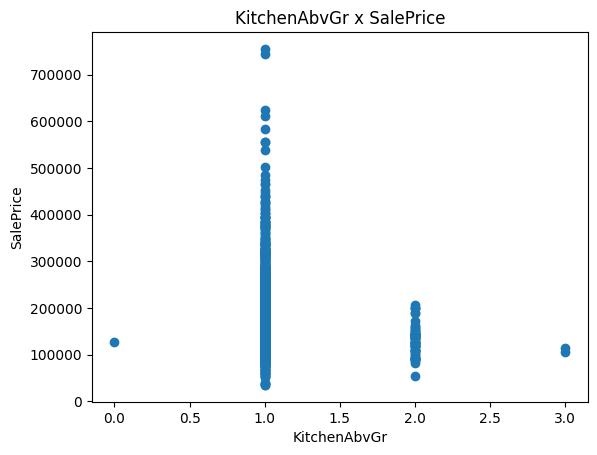

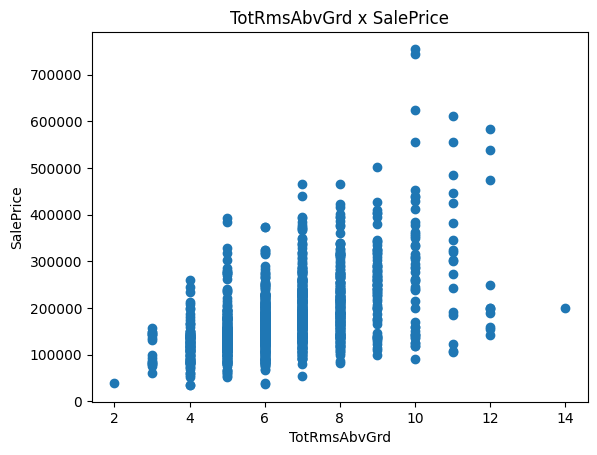

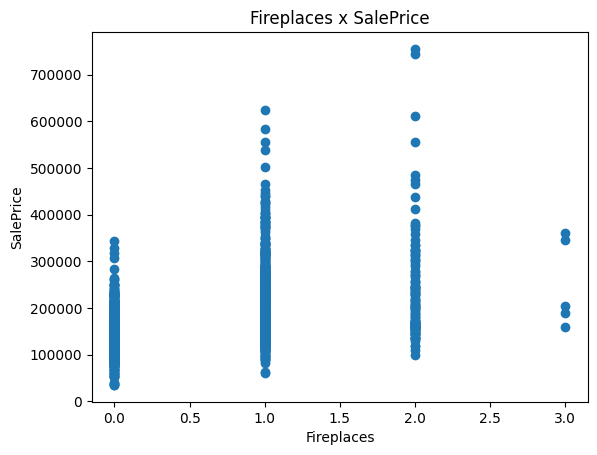

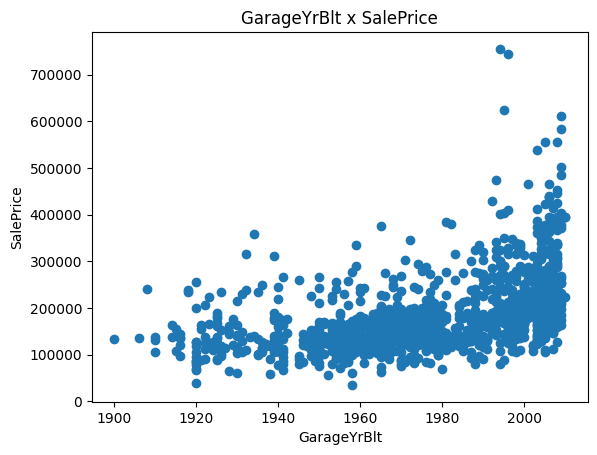

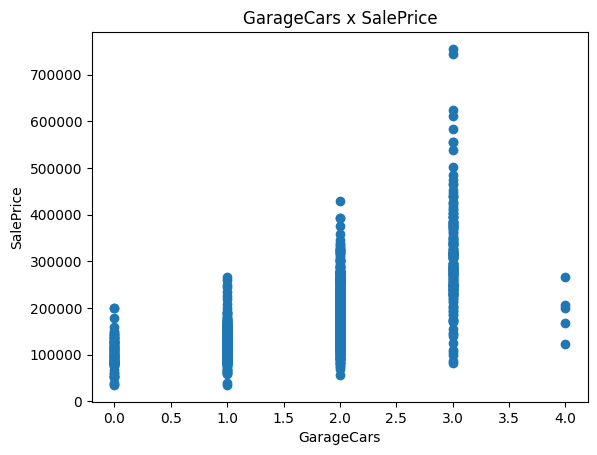

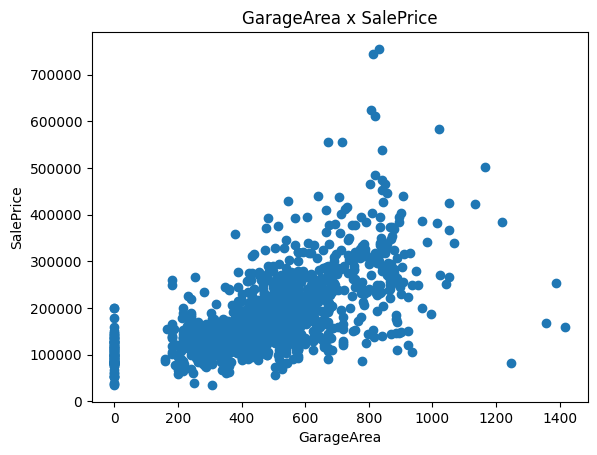

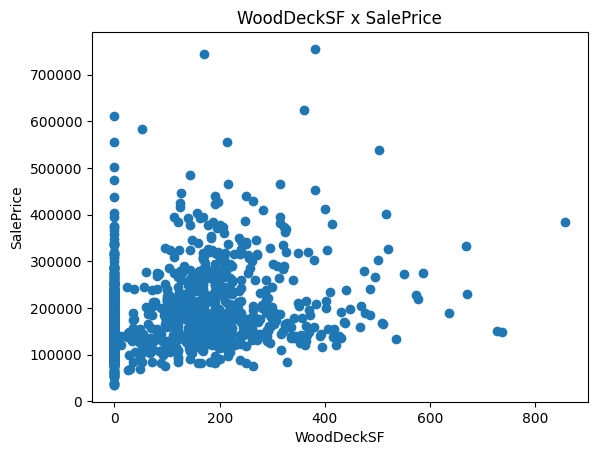

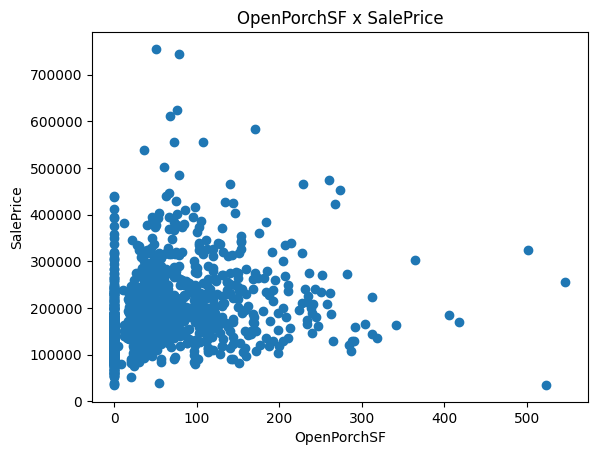

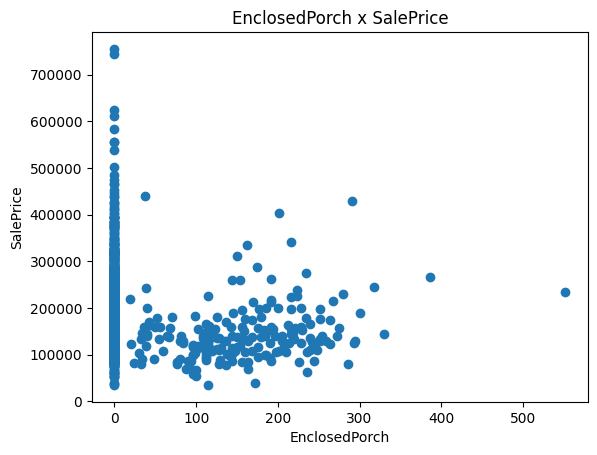

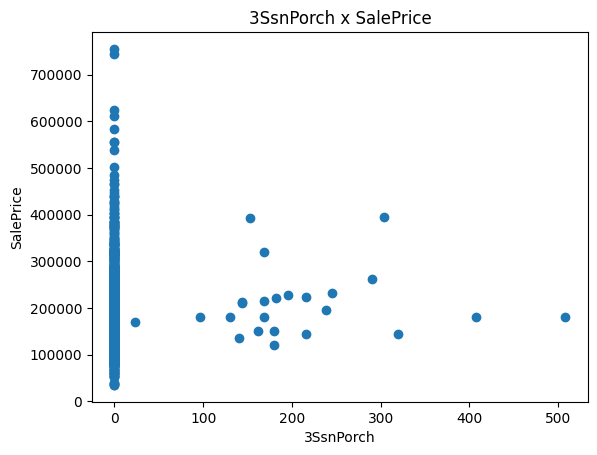

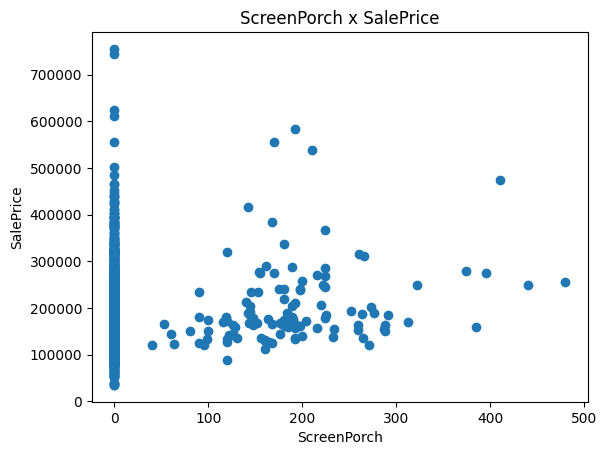

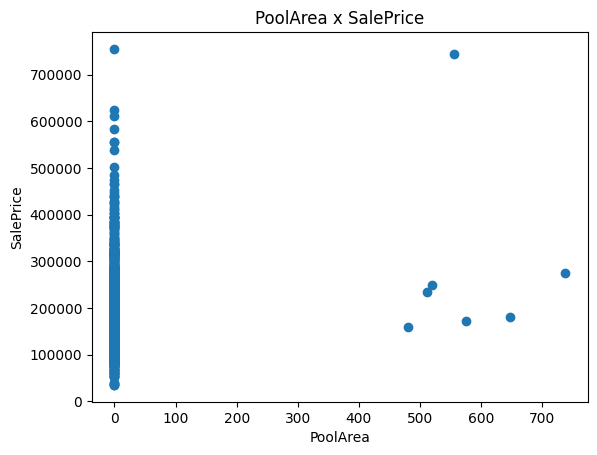

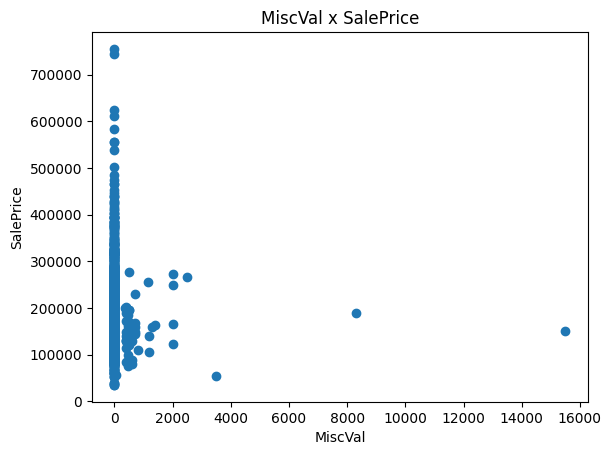

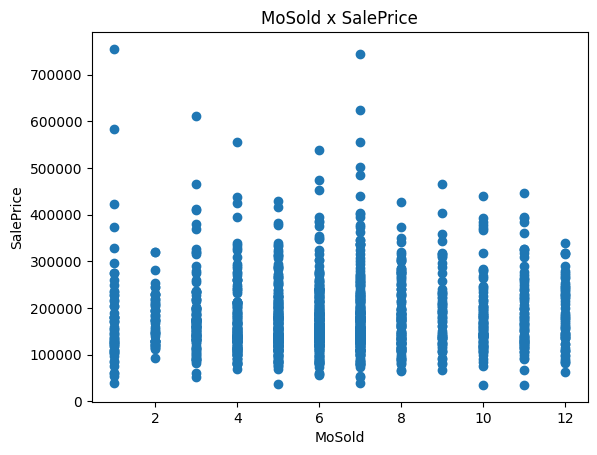

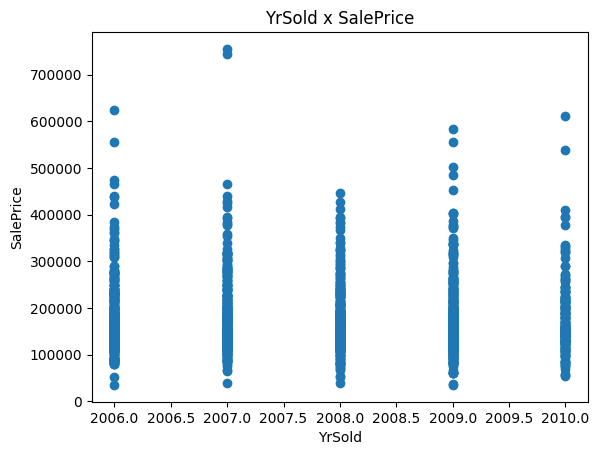

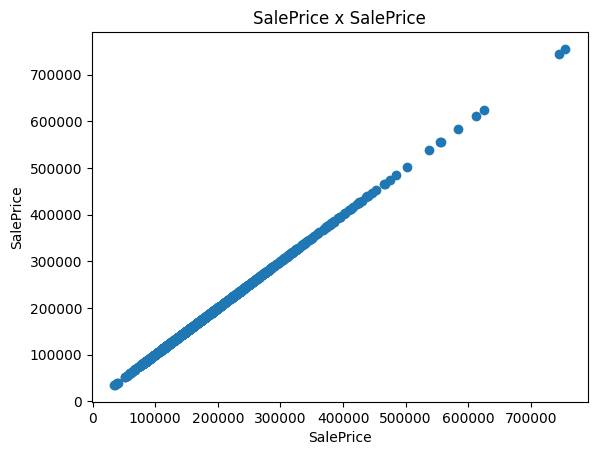

In [719]:
for i, classe_name in enumerate(train_df.dtypes[train_df.dtypes != 'object'].index):
    plt.figure(i)
    plt.scatter(train_df[classe_name], train_df['SalePrice'])
    plt.xlabel(classe_name)
    plt.ylabel('SalePrice')
    plt.title(f'{classe_name} x SalePrice')

In [720]:
# Select numerical columns only
X_num = train_df.select_dtypes(include=[np.number]).columns.to_list()

# Select categorical columns only
X_cat = train_df.select_dtypes(include=[object]).columns.to_list()

print(X_num)
print(X_cat)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Gara

In [721]:
# Normaliser les données
train_df_numeric = train_df.select_dtypes(include=[int, float])

# Créer la pipeline pour imputer les valeurs manquantes et normaliser les données
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),  # Remplacer les NaN par la moyenne
    ("scaler", MinMaxScaler())                    # Normaliser les données entre 0 et 1
])

# Appliquer la pipeline aux données
data_processed = pipeline.fit_transform(train_df_numeric)

# Si tu veux convertir le résultat en DataFrame
data_processed_df = pd.DataFrame(data_processed, columns=train_df_numeric.columns)


In [722]:
# Définir l'architecture de l'auto-encodeur
input_dim = data_processed.shape[1] 
print(f'nombre de variables : {input_dim}')

autoencoder = Sequential([
    Dense(32, activation="tanh", input_shape=(input_dim,)),
    Dense(16, activation="tanh"),
    Dense(12, activation="tanh"),  # Couche de compression
    Dense(16, activation="tanh"),
    Dense(32, activation="tanh"),
    Dense(input_dim, activation="sigmoid")  # La sortie doit être de la même dimension que l'entrée
])

# Compiler le modèle
autoencoder.compile(optimizer="adam", loss='mse')

autoencoder.summary()

nombre de variables : 38


/Users/mathisaulagnier/.virtualenvs/projFinalVenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_150 (Dense)               │ (None, 32)             │         1,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 12)             │           204 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_155 (Dense)               │ (None, 38)             │         1,254 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,986 (15.57 KB)

 Trainable params: 3,986 (15.57 KB)

 Non-trainable params: 0 (0.00 B)

In [723]:
# Vérifier les valeurs NaN et infinies
print(np.isnan(data_processed).sum())  # Nombre de valeurs NaN
print(np.isinf(data_processed).sum())  # Nombre de valeurs infinies

0
0


In [724]:
history = autoencoder.fit(data_processed, data_processed, epochs=30, batch_size=32)

Epoch 1/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 724us/step - loss: 0.1103
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 0.0372
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - loss: 0.0284
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 0.0259
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 0.0242
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.0235
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 0.0220
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 0.0212
Epoch 9/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.0207
Epoch 10/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 0.0198
Epoch 11/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 0.0191
Epoch 12/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 0.0178
Epoch 13/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 0.0173
Epoch 14/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 0.0165
Epoch 15/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - lo

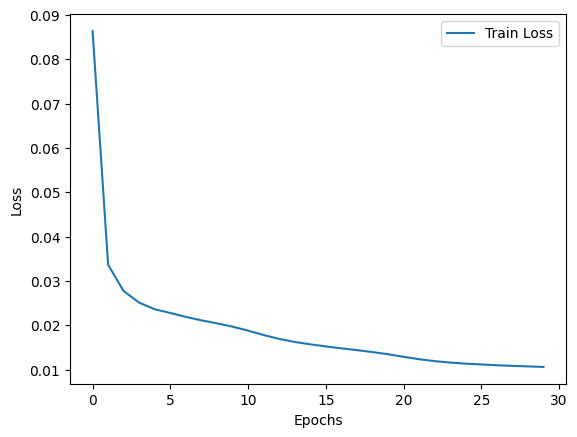

In [725]:
# Visualiser la courbe de perte d'entraînement
plt.plot(history.history['loss'], label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [726]:
# Obtenir les prédictions
predictions = autoencoder.predict(data_processed)

# Calculer les erreurs de reconstruction
reconstruction_error = np.mean(np.square(data_processed - predictions), axis=1)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step


In [727]:
# Définir le seuil comme la moyenne + un multiple de l'écart-type
threshold_multiplier = 1
threshold = np.mean(reconstruction_error) + threshold_multiplier * np.std(reconstruction_error)
threshold

0.018054678047128833

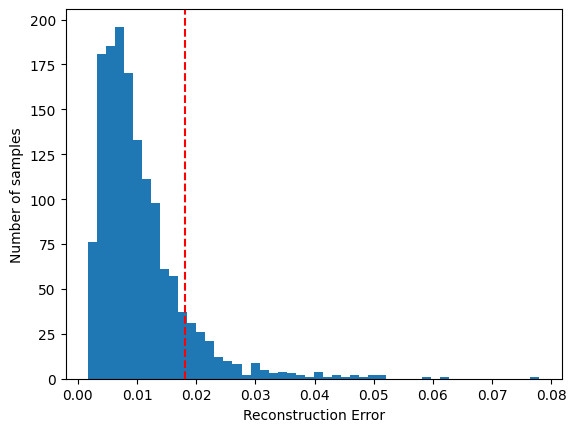

Le nombre de valeurs aberrantes est de 162


In [728]:
# Afficher les erreurs de reconstruction
plt.hist(reconstruction_error, bins=50)
plt.xlabel('Reconstruction Error')
plt.ylabel('Number of samples')
plt.axvline(x=threshold, color='red', linestyle='--')
plt.show()

print(f'Le nombre de valeurs aberrantes est de {np.sum(reconstruction_error > threshold)}')

In [729]:
# Identifier les outliers
outliers = reconstruction_error > threshold

# Recontruire le DataFrame original sans les outliers
train_df_no_outliers = train_df[~outliers]
len(train_df_no_outliers)

1298

In [730]:
values = [598, 955, 935, 1299, 250, 314, 336, 707, 379, 1183, 692, 186, 441, 186, 524, 739, 598, 955, 636, 1062, 1191, 496, 198, 1338]
train_df_video = train_df[train_df.Id.isin(values) == False]
len(train_df_video)

1439

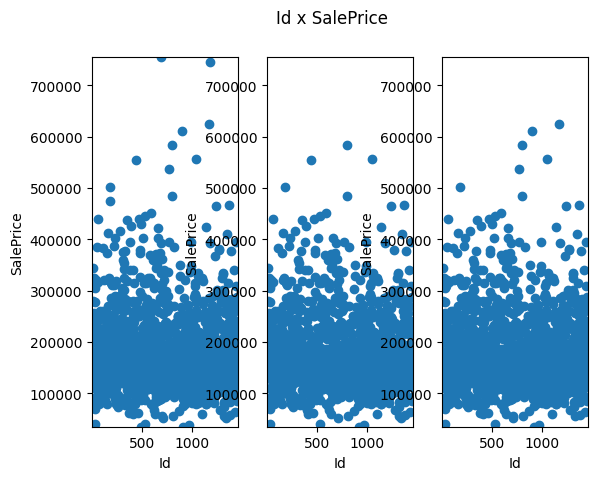

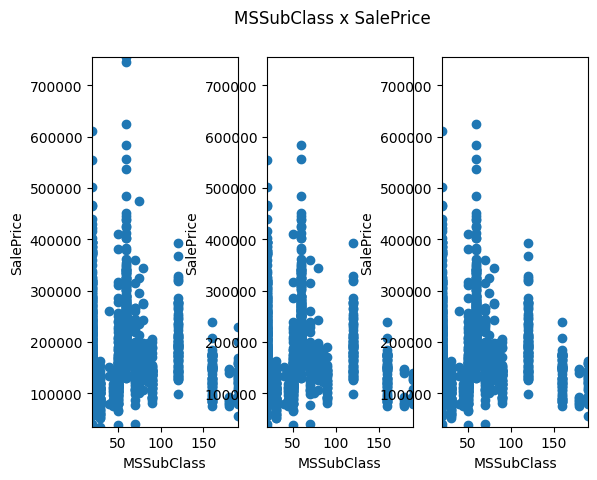

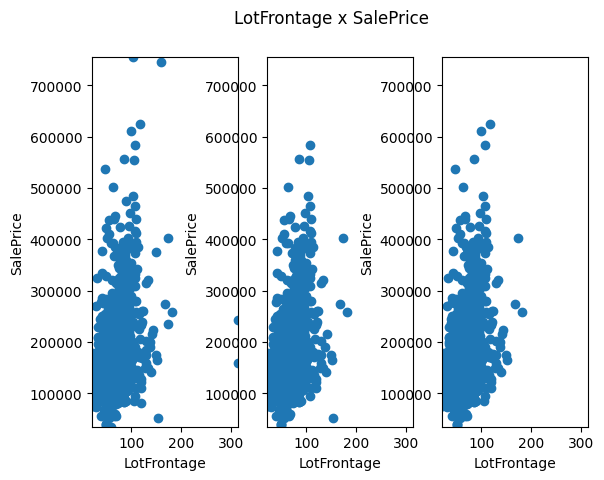

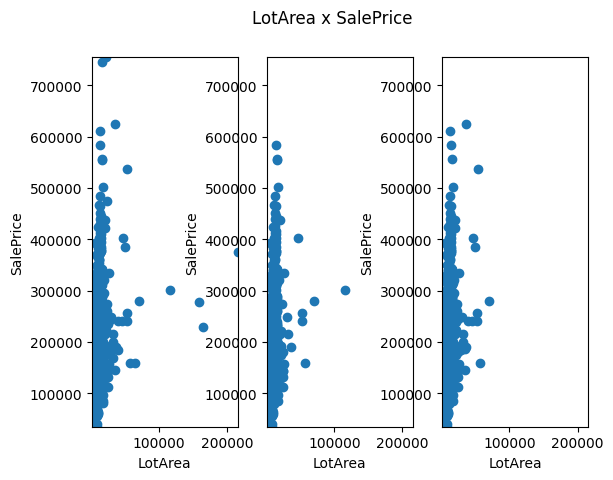

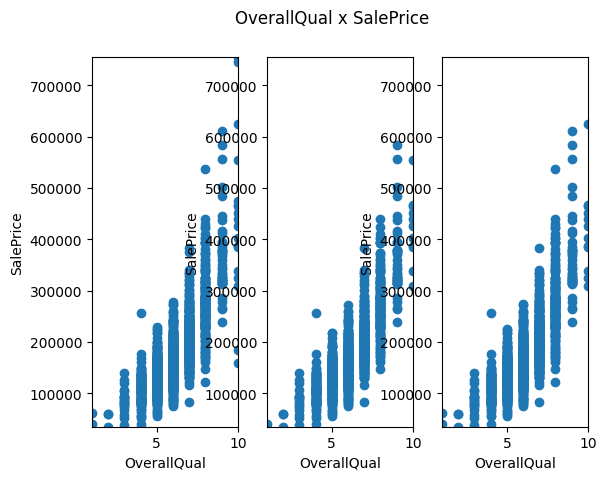

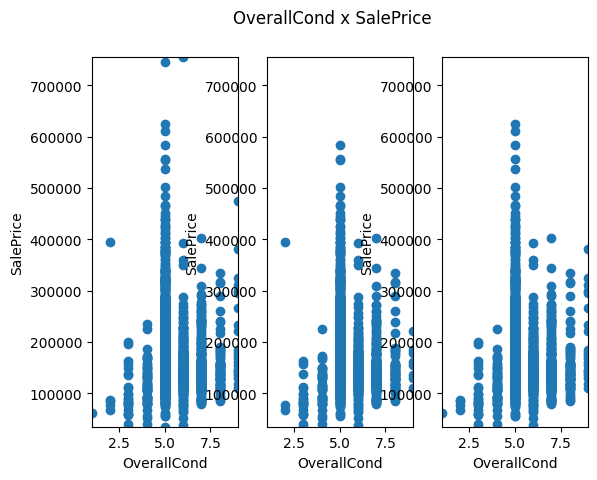

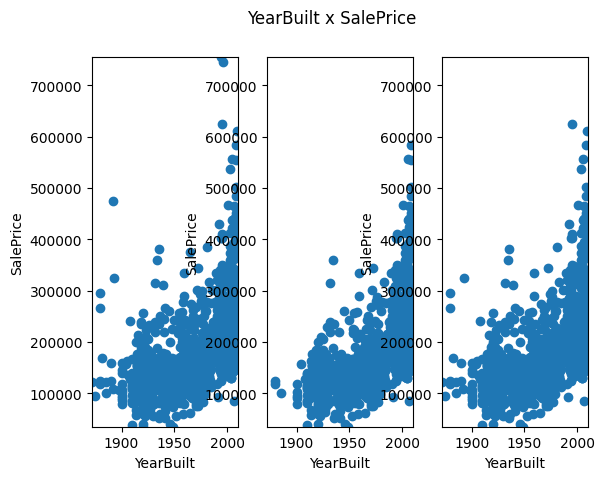

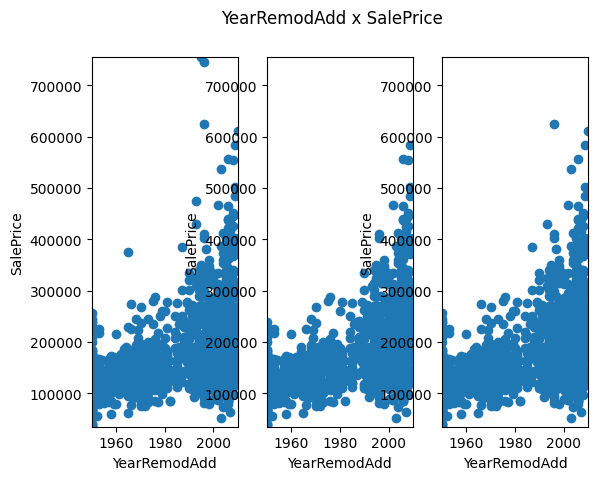

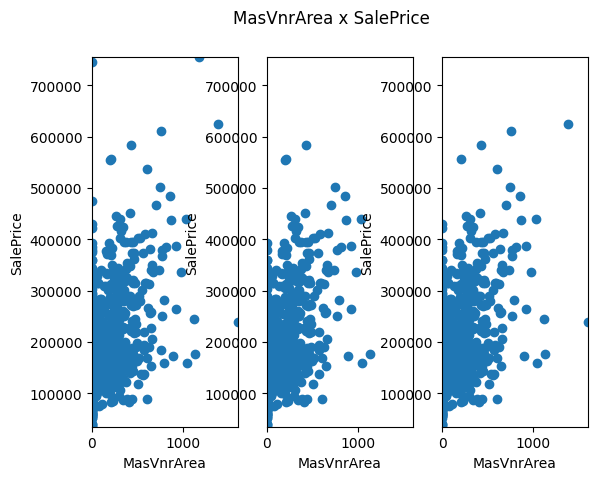

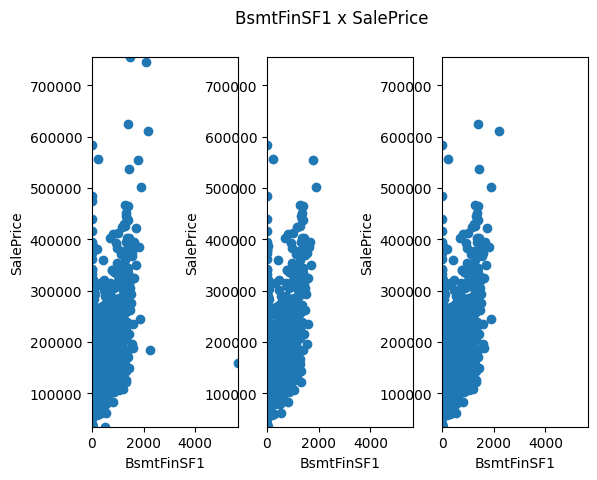

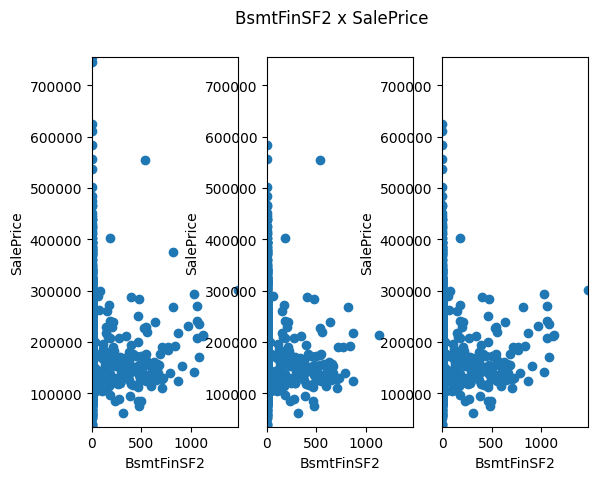

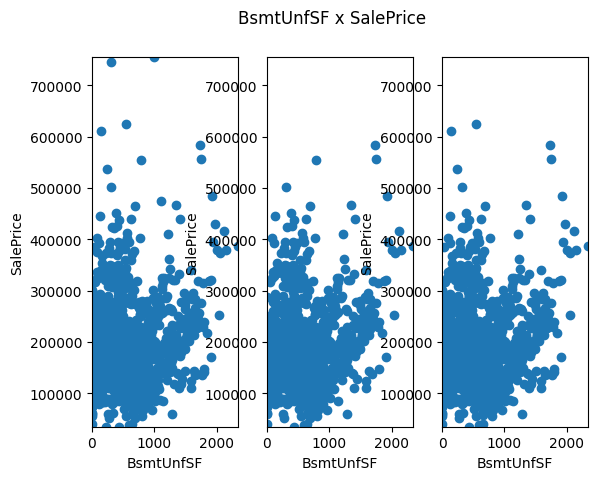

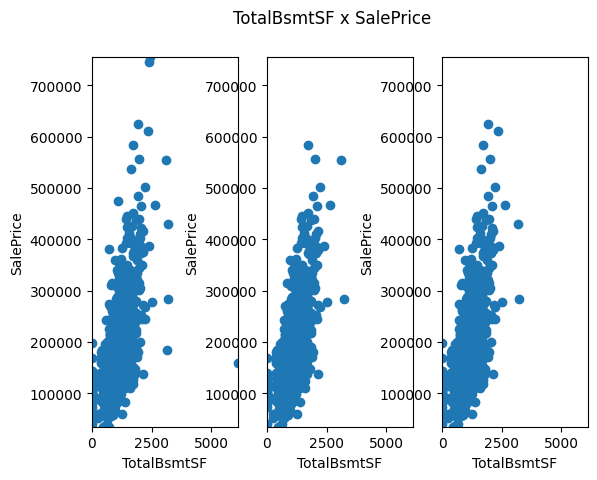

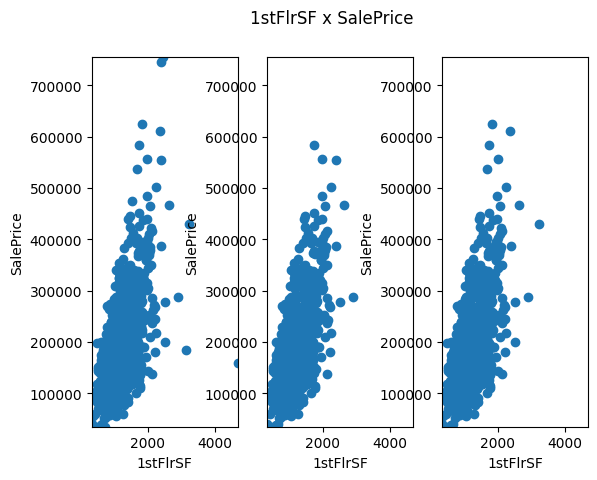

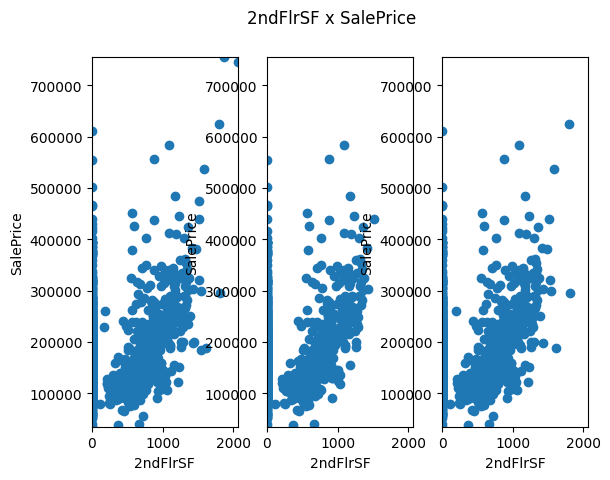

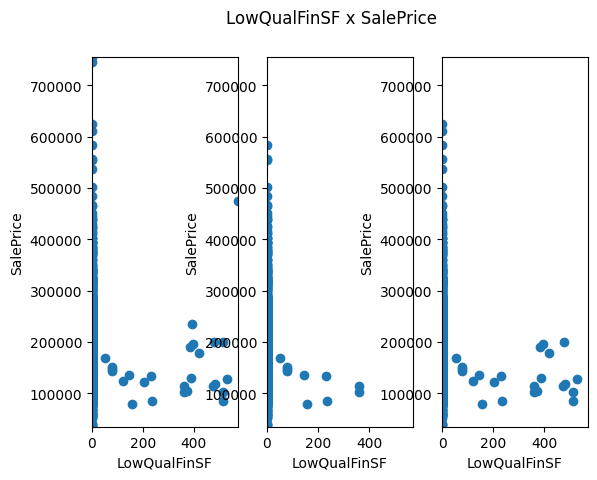

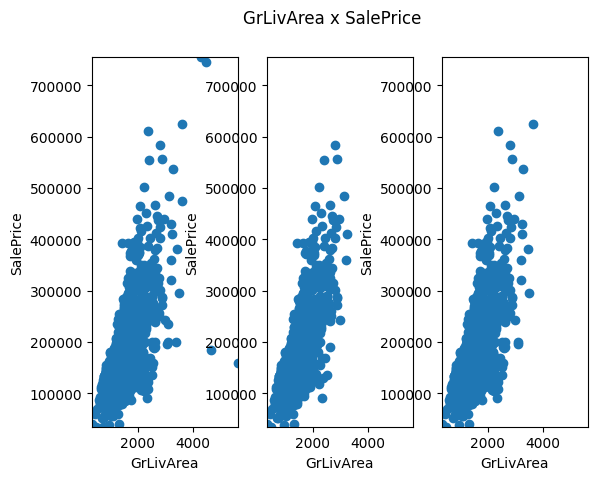

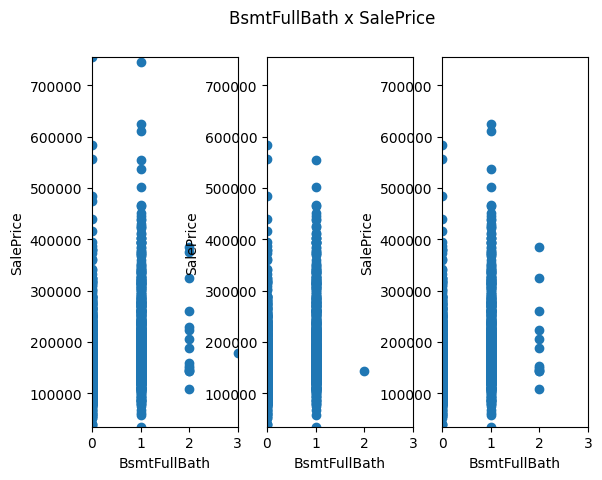

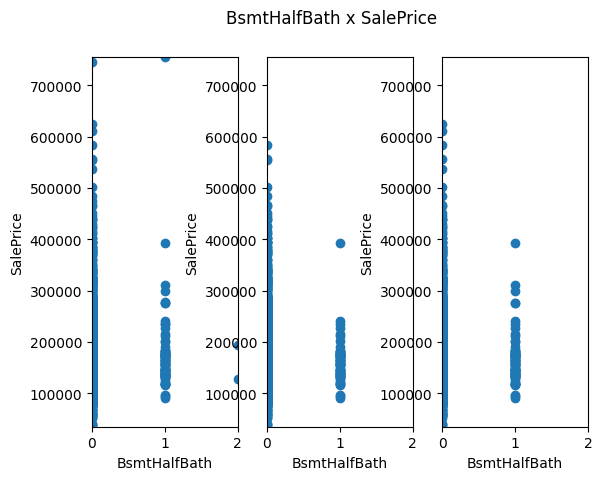

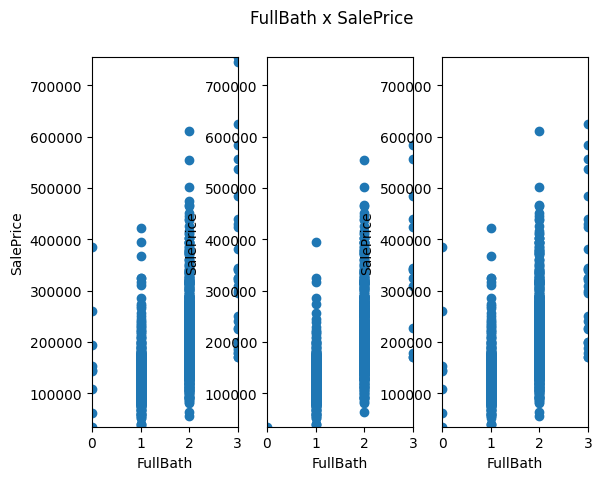

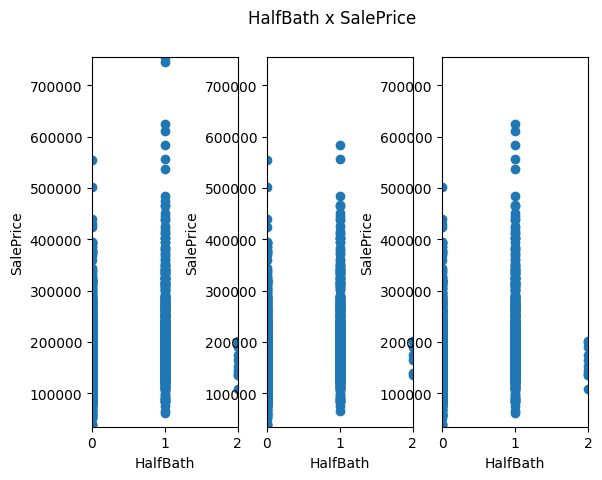

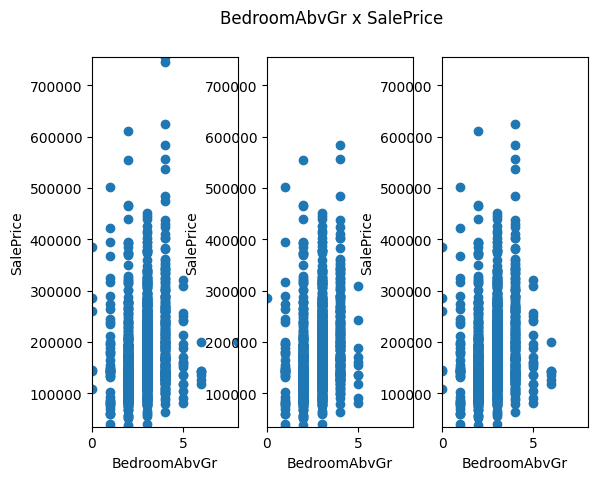

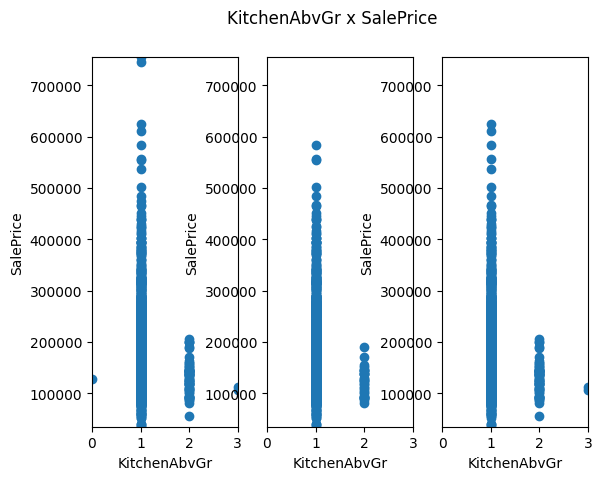

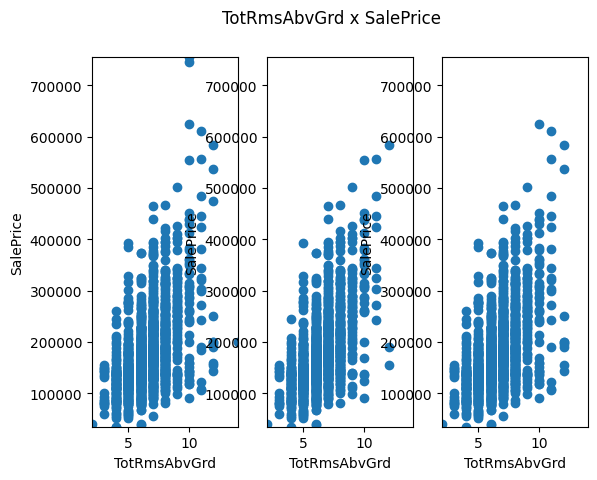

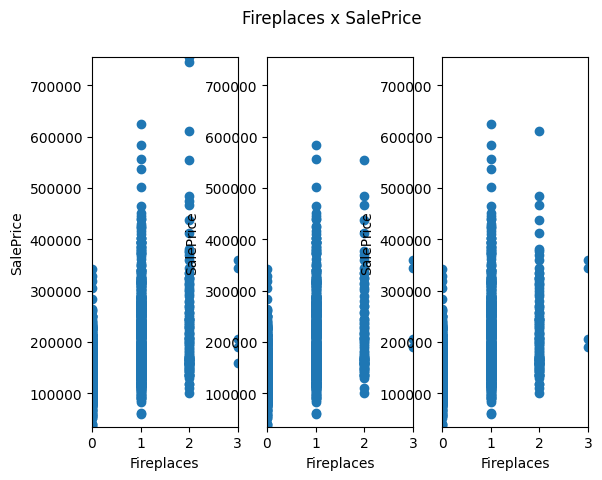

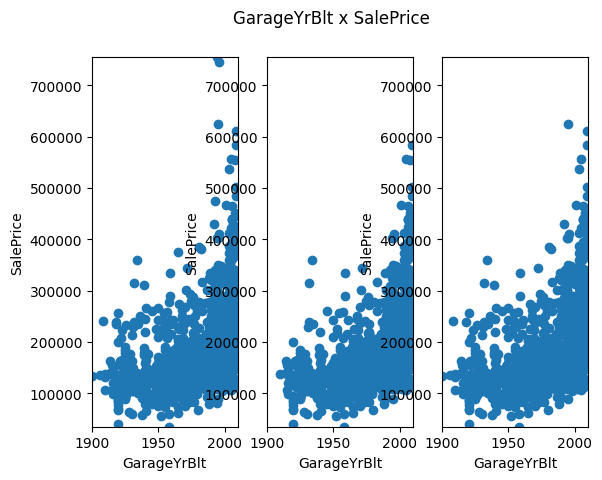

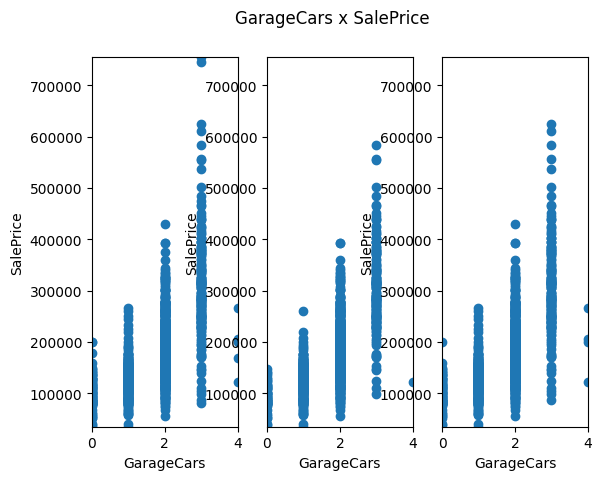

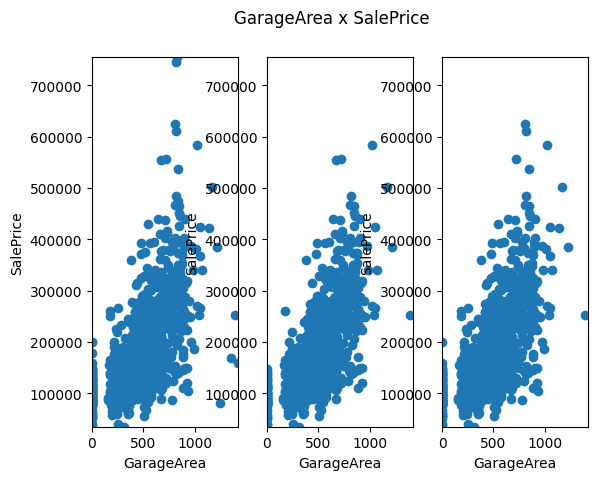

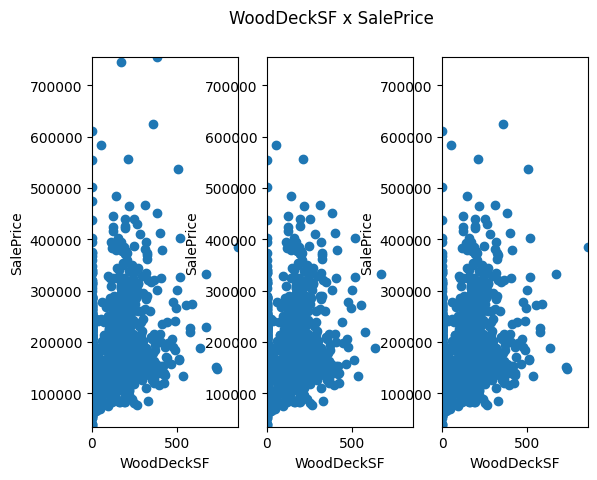

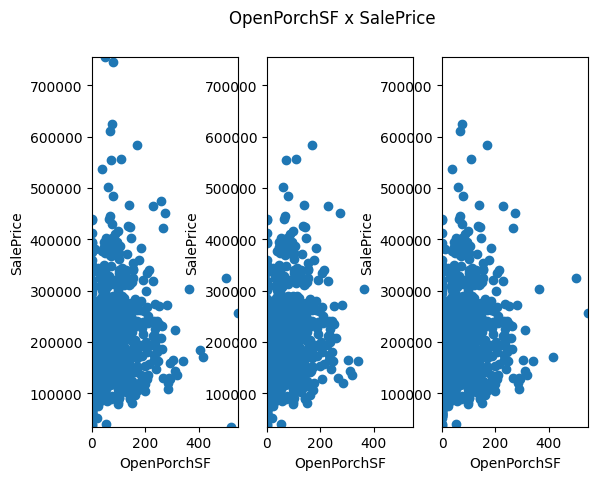

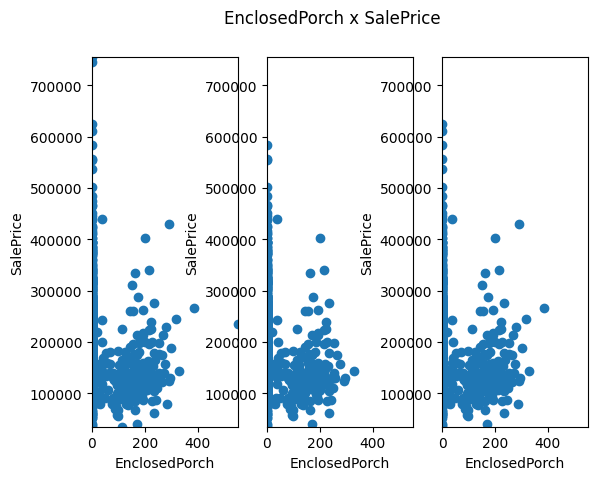

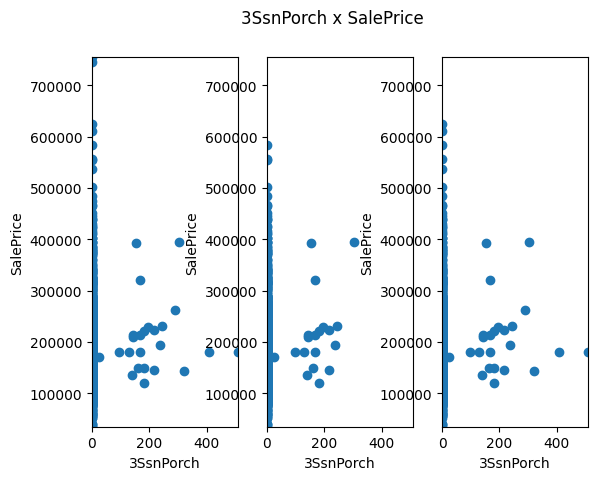

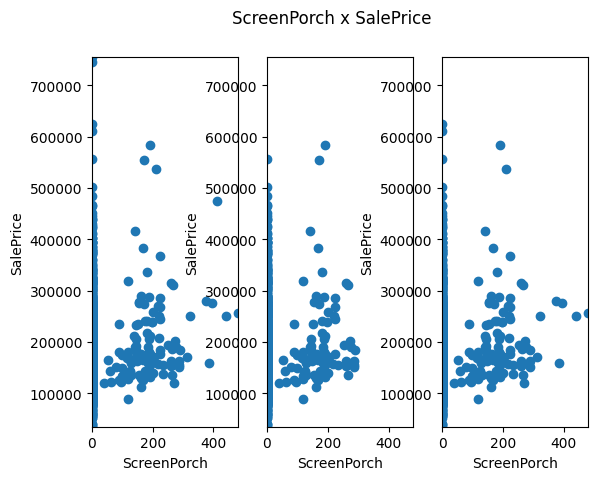

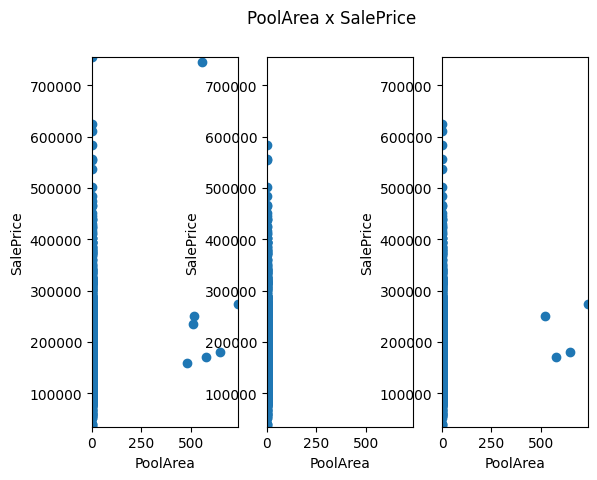

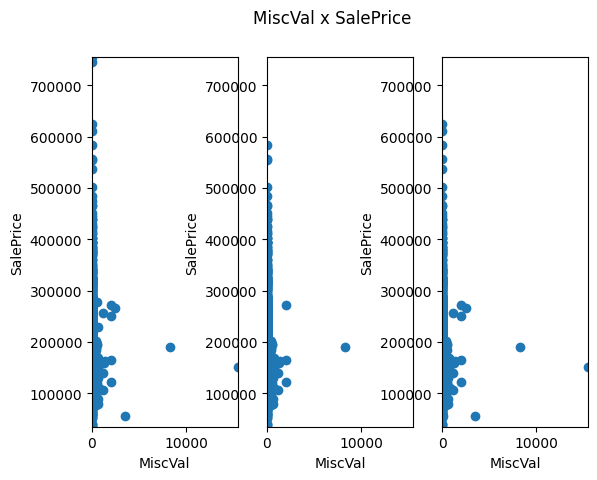

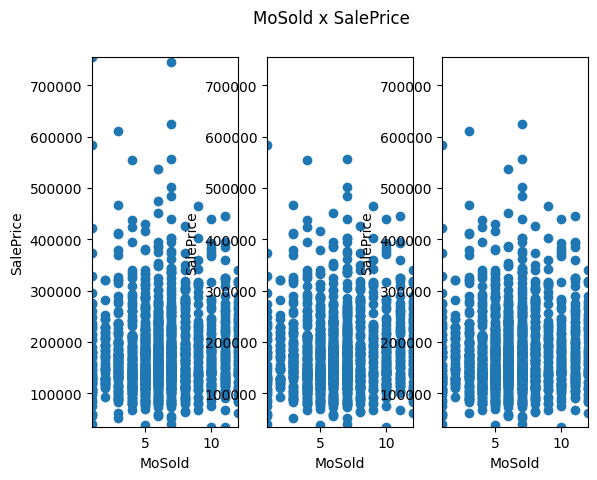

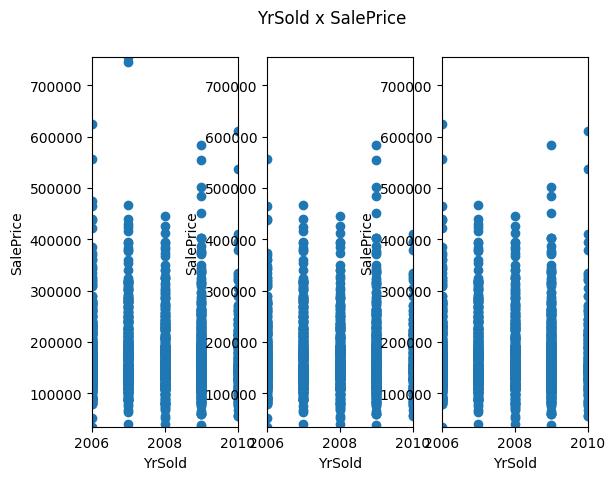

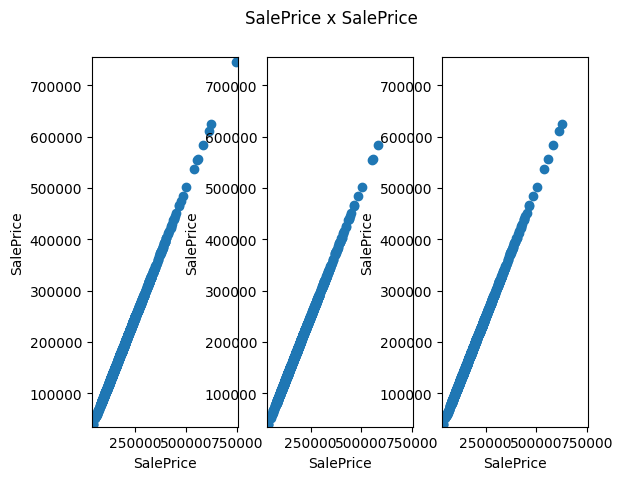

In [731]:
for i, classe_name in enumerate(train_df.dtypes[train_df.dtypes != 'object'].index):
    plt.figure(i)
    plt.suptitle(f'{classe_name} x SalePrice')
    
    # Définir les limites des axes
    x_min = min(train_df[classe_name].min(), train_df_no_outliers[classe_name].min(), train_df_video[classe_name].min())
    x_max = max(train_df[classe_name].max(), train_df_no_outliers[classe_name].max(), train_df_video[classe_name].max())
    y_min = min(train_df['SalePrice'].min(), train_df_no_outliers['SalePrice'].min(), train_df_video['SalePrice'].min())
    y_max = max(train_df['SalePrice'].max(), train_df_no_outliers['SalePrice'].max(), train_df_video['SalePrice'].max())

    
    plt.subplot(1, 3, 1)
    plt.scatter(train_df[classe_name], train_df['SalePrice'])
    plt.xlabel(classe_name)
    plt.ylabel('SalePrice')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    plt.subplot(1, 3, 2)
    plt.scatter(train_df_no_outliers[classe_name], train_df_no_outliers['SalePrice'])
    plt.xlabel(classe_name)
    plt.ylabel('SalePrice')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.subplot(1, 3, 3)
    plt.scatter(train_df_video[classe_name], train_df_video['SalePrice'])
    plt.xlabel(classe_name)
    plt.ylabel('SalePrice')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)


    plt.show()

In [732]:
# intersection des deux dataframes
train_df_target = pd.merge(train_df_no_outliers, train_df_video, how='inner')
len(train_df_target)

1294

# Nous allons regarder les colonnes qui ont des valeurs manquantes

In [733]:
pd.DataFrame(train_df_target.isnull().sum()).sort_values(by=0, ascending=False).head(20)

0
PoolQC        1294
MiscFeature   1251
Alley         1222
Fence         1053
MasVnrType     756
FireplaceQu    618
LotFrontage    230
GarageYrBlt     52
GarageCond      52
GarageType      52
GarageFinish    52
GarageQual      52
BsmtFinType2    33
BsmtExposure    33
BsmtQual        32
BsmtCond        32
BsmtFinType1    32
MasVnrArea       7
Electrical       1
Id               0

/var/folders/yg/cwb_z5jd7td2v3xzmnb8rpc40000gn/T/ipykernel_23430/2680241302.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df_target['MasVnrType'].fillna('Unknown', inplace=True)


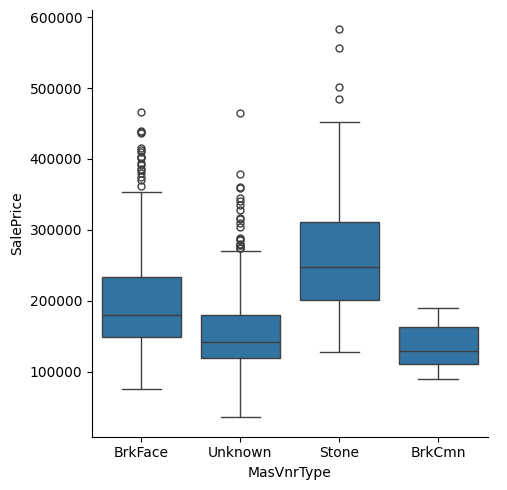

In [734]:
# PoolQC -> Pool Quality
train_df_target = train_df_target.drop('PoolQC', axis=1)
test_df = test_df.drop('PoolQC', axis=1)
# MiscFeature -> Miscellaneous feature not covered in other categories
train_df_target = train_df_target.drop('MiscFeature', axis=1)
test_df = test_df.drop('MiscFeature', axis=1)
# Alley -> Type of alley access to property
train_df_target = train_df_target.drop('Alley', axis=1)
test_df = test_df.drop('Alley', axis=1)
# Fence -> Fence quality
train_df_target = train_df_target.drop('Fence', axis=1)
test_df = test_df.drop('Fence', axis=1)
# MasVnrType -> Masonry veneer type
train_df_target['MasVnrType'].fillna('Unknown', inplace=True)
sns.catplot(data=train_df_target, x="MasVnrType", y="SalePrice", kind="box")

In [735]:
## On remarque que les valeurs 'BrkCmn' et 'Unknown' ont des prix de vente moyen similaires
train_df_target['MasVnrType'] = train_df_target['MasVnrType'].replace('Unknown', 'BrkCmn')
test_df['MasVnrType'].fillna('BrkCmn', inplace=True)

/var/folders/yg/cwb_z5jd7td2v3xzmnb8rpc40000gn/T/ipykernel_23430/1335097343.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['MasVnrType'].fillna('BrkCmn', inplace=True)


/var/folders/yg/cwb_z5jd7td2v3xzmnb8rpc40000gn/T/ipykernel_23430/3596022086.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df_target['FireplaceQu'].fillna('Unknown', inplace=True)


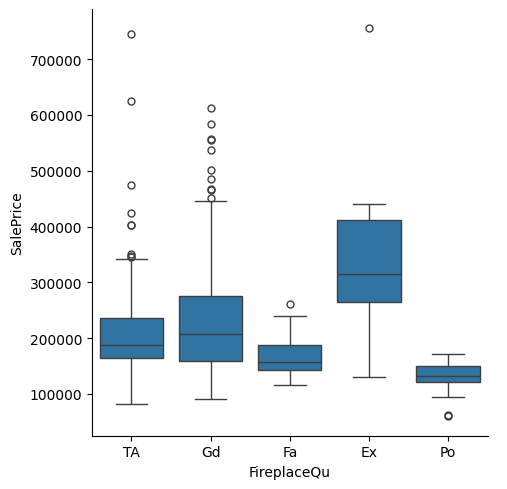

In [736]:
# FireplaceQu -> Fireplace quality
train_df_target['FireplaceQu'].fillna('Unknown', inplace=True)
sns.catplot(data=train_df, x="FireplaceQu", y="SalePrice", kind="box")

In [737]:
train_df_target['FireplaceQu'] = train_df_target['FireplaceQu'].replace('Unknown', 'Po')
test_df['FireplaceQu'].fillna('Po', inplace=True)
# LotFrontage -> Linear feet of street connected to property (remplacer les NaN par la médiane)
train_df_target['LotFrontage'].fillna(train_df_target['LotFrontage'].median(), inplace=True)

# GarageYrBlt -> Year garage was built 
print(f'Correlation between GarageYrBlt and SalePrice: {train_df_target["GarageYrBlt"].corr(train_df_target["SalePrice"])}')
train_df_target = train_df_target.drop('GarageYrBlt', axis=1)
test_df = test_df.drop('GarageYrBlt', axis=1)

# GarageCond -> Garage condition
train_df_target = train_df_target.drop(columns='GarageCond')
test_df = test_df.drop(columns='GarageCond')

# GarageType -> Garage location
train_df_target['GarageType'].fillna('Unknown', inplace=True)
test_df['GarageType'].fillna('Unknown', inplace=True)

# GarageFinish -> Interior finish of the garage
train_df_target['GarageFinish'].fillna('Unf', inplace=True)
test_df['GarageFinish'].fillna('Unf', inplace=True)

# GarageQual -> Garage quality
train_df_target['GarageQual'].fillna('TA', inplace=True)
test_df['GarageQual'].fillna('TA', inplace=True)

Correlation between GarageYrBlt and SalePrice: 0.5573360106416062


/var/folders/yg/cwb_z5jd7td2v3xzmnb8rpc40000gn/T/ipykernel_23430/3506589495.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['FireplaceQu'].fillna('Po', inplace=True)
/var/folders/yg/cwb_z5jd7td2v3xzmnb8rpc40000gn/T/ipykernel_23430/3506589495.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

/var/folders/yg/cwb_z5jd7td2v3xzmnb8rpc40000gn/T/ipykernel_23430/2164783334.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df_target['BsmtExposure'].fillna('NoBasement', inplace=True)
/var/folders/yg/cwb_z5jd7td2v3xzmnb8rpc40000gn/T/ipykernel_23430/2164783334.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

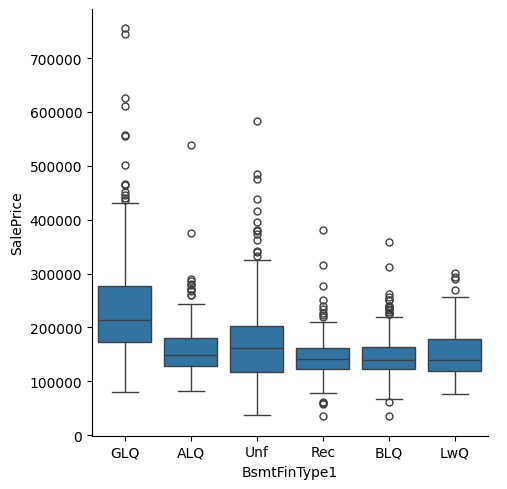

In [738]:
# BsmtFinType2 
train_df_target = train_df_target.drop('BsmtFinType2', axis=1)
test_df = test_df.drop('BsmtFinType2', axis=1)

# BsmtExposure  
train_df_target['BsmtExposure'].fillna('NoBasement', inplace=True)
test_df['BsmtExposure'].fillna('NoBasement', inplace=True)

# BsmtQual
train_df_target['BsmtQual'].fillna('NoBasement', inplace=True)
test_df['BsmtQual'].fillna('NoBasement', inplace=True)

# BsmtCond
train_df_target['BsmtCond'].fillna('NoBasement', inplace=True)
test_df['BsmtCond'].fillna('NoBasement', inplace=True)

# BsmtFinType1
train_df_target['BsmtFinType1'].fillna('NoBasement', inplace=True)
sns.catplot(data=train_df, x="BsmtFinType1", y="SalePrice", kind="box")

In [739]:
train_df_target['BsmtFinType1'] = train_df_target['BsmtFinType1'].replace('NoBasement', 'Unf')
test_df['BsmtFinType1'].fillna('Unf', inplace=True)
train_df_target['MasVnrArea'].fillna(0, inplace=True)
test_df['MasVnrArea'].fillna(0, inplace=True)
train_df_target['Electrical'].fillna('SBrkr', inplace=True)
test_df['Electrical'].fillna('SBrkr', inplace=True)

/var/folders/yg/cwb_z5jd7td2v3xzmnb8rpc40000gn/T/ipykernel_23430/2582636841.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['BsmtFinType1'].fillna('Unf', inplace=True)
/var/folders/yg/cwb_z5jd7td2v3xzmnb8rpc40000gn/T/ipykernel_23430/2582636841.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [740]:
train_df_target.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   5          60       RL         84.0    14260   Pave      IR1         Lvl   
4   7          20       RL         75.0    10084   Pave      Reg         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub       FR2  ...             0         0           0        0   
4    AllPub    Inside  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0     12    2008        WD         Normal     250000  
4       0      8    2007        WD         Normal     307000  

[5 rows x 74 columns]

In [741]:
test_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0  1461          20       RH         80.0    11622   Pave      Reg   
1  1462          20       RL         81.0    14267   Pave      IR1   
2  1463          60       RL         74.0    13830   Pave      IR1   
3  1464          60       RL         78.0     9978   Pave      IR1   
4  1465         120       RL         43.0     5005   Pave      IR1   

  LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0         Lvl    AllPub    Inside  ...           0             0         0   
1         Lvl    AllPub    Corner  ...          36             0         0   
2         Lvl    AllPub    Inside  ...          34             0         0   
3         Lvl    AllPub    Inside  ...          36             0         0   
4         HLS    AllPub    Inside  ...          82             0         0   

  ScreenPorch PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         120        0       0       6    2010        WD         Normal  
1           0        0   12500       6    2010        WD         Normal  
2           0        0       0       3    2010        WD         Normal  
3           0        0       0       6    2010        WD         Normal  
4         144        0       0       1    2010        WD         Normal  

[5 rows x 73 columns]

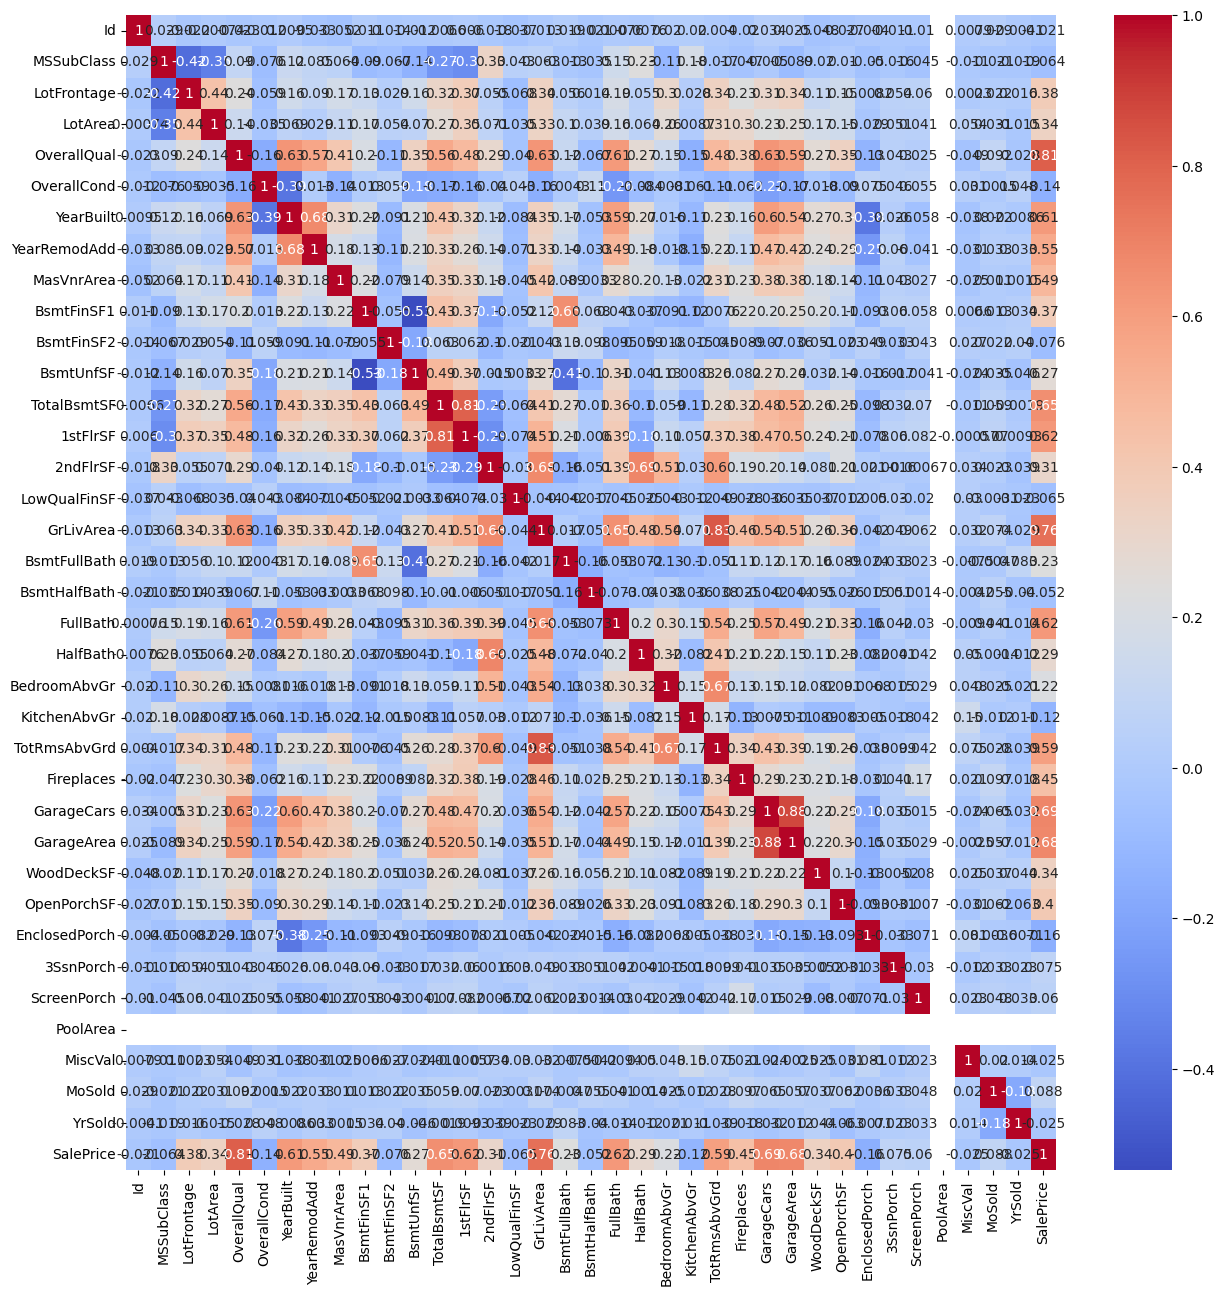

In [742]:
# Matrice de corrélation
corr = train_df_target.corr(numeric_only=True)
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [743]:
train_df_target = train_df_target.drop(columns=['GarageArea'])
test_df = test_df.drop(columns=['GarageArea'])

<Axes: xlabel='SalePrice', ylabel='Count'>

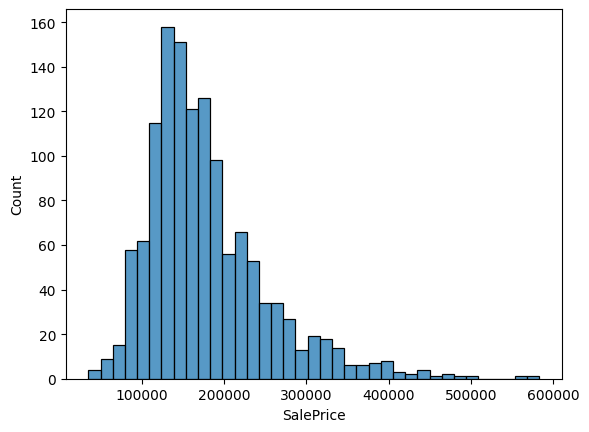

In [744]:
sns.histplot(
    train_df_target,
    x=train_df_target['SalePrice']
)

In [745]:
# Il a été remarqué qu'appliquer le logarithme sur la variable cible permet de mieux modéliser les données
train_df_target['SalePrice'] = np.log1p(train_df_target['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

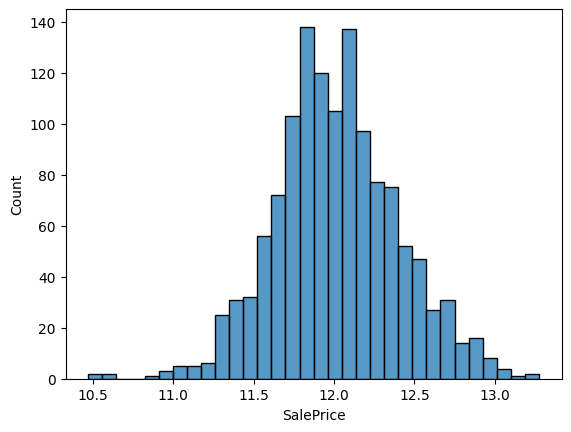

In [746]:
sns.histplot(
    train_df_target,
    x=train_df_target['SalePrice']
)

In [747]:
train_df_target.dtypes[train_df_target.dtypes == 'object']

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [748]:
ordinal_columns = [
    'LotShape', 
    'LandContour',
    'Utilities',
    'LandSlope',  
    'BsmtQual',  
    'BsmtFinType1',  
    'CentralAir',  
    'Functional', 
    'FireplaceQu', 
    'GarageFinish', 
    'GarageQual', 
    'PavedDrive', 
    'ExterCond', 
    'KitchenQual', 
    'BsmtExposure', 
    'HeatingQC',
    'ExterQual', 
    'BsmtCond'
]

categorical_columns = [
    'Street', 
    'LotConfig',
    'Neighborhood', 
    'Condition1', 
    'Condition2', 
    'BldgType', 
    'HouseStyle', 
    'RoofStyle', 
    'Exterior1st', 
    'Exterior2nd',
    'MasVnrType',
    'Foundation',  
    'Electrical',  
    'SaleType', 
    'MSZoning', 
    'SaleCondition', 
    'Heating', 
    'GarageType', 
    'RoofMatl'
]

numerical_columns = train_df_target.select_dtypes(include=[np.number]).columns.to_list()
numerical_columns.remove('SalePrice')

In [749]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Remplace les valeurs manquantes par la moyenne
    ('scaler', StandardScaler()) # Standardise les valeurs (Moyenne = 0, Ecart-type = 1)
]) 

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Remplace les valeurs manquantes par 'missing'
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # Encodage one-hot
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Remplace les valeurs manquantes par 'missing'
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)) # Encodage ordinal
])

In [750]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns),
        ('ord', ordinal_transformer, ordinal_columns)
    ],
    remainder='passthrough', # Ignore les colonnes non transformées
    n_jobs=-1 # Utilise tous les coeurs du CPU
)

In [751]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])

In [752]:
X = train_df_target.drop(columns='SalePrice')
y = train_df_target['SalePrice']

In [753]:
X_preprocessed = pipeline.fit_transform(X)

In [754]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=25)

# Data Science

In [777]:
# Models
from sklearn.linear_model import (
    LinearRegression, 
    Ridge
)

from sklearn.ensemble import (
    RandomForestRegressor, 
    GradientBoostingRegressor, 
    VotingRegressor, 
    StackingRegressor
)

from xgboost import XGBRegressor

# Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Linear Regression

In [756]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f'Linear Regression: {mean_squared_error(y_test, y_pred)}')

Linear Regression: 5.740597589763831e+18


In [759]:
rfr = RandomForestRegressor()

rfr_param_grid = {
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 250, 500],
    'min_samples_split': [3, 5, 10]
}

rfr_grid = GridSearchCV(rfr, rfr_param_grid, cv=5, scoring='neg_mean_squared_error' ,n_jobs=-1)
rfr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 250, 500]},
             scoring='neg_mean_squared_error')

In [761]:
np.sqrt(-1 * rfr_grid.best_score_)

0.132768379667588

In [763]:
rfr_grid.best_params_

{'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 250}

### XGboost Regression

In [764]:
xgb = XGBRegressor()
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5],
    'n_estimators': [100, 250, 500]
}

xgb_grid = GridSearchCV(
    xgb, 
    xgb_param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1
)

xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5],
                         'n_estimators': [100, 250, 500]},
             scoring='neg_mean_squared_error')

In [765]:
np.sqrt(-1 * xgb_grid.best_score_)

0.12414487410195824

### Ridge Regression

In [766]:
ridge = Ridge()
ridge_param_grid = {
    'alpha': [0.05, 0.1, 1, 3, 5],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

ridge_grid = GridSearchCV(
    ridge, 
    ridge_param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1
)

ridge_grid.fit(X_train, y_train)

/Users/mathisaulagnier/.virtualenvs/projFinalVenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mathisaulagnier/.virtualenvs/projFinalVenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mathisaulagnier/.virtualenvs/projFinalVenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mathisaulagnier/.virtualenvs/projFinalVenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mathisaulagnier/.virtualenvs/projFinalVenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_ite

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.05, 0.1, 1, 3, 5],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             scoring='neg_mean_squared_error')

In [768]:
np.sqrt(-1 * ridge_grid.best_score_)

0.11611012793527438

### Gradient Boosting Regressor

In [769]:
gdr = GradientBoostingRegressor()

gdr_param_grid = {
    'learning_rate': [0.01, 0.1, 0.001],
    'max_depth': [10,15,20],
    'n_estimators': [100, 250, 500, 1000],
    'min_samples_split': [10, 25, 50], 
    'max_features': [0.01, 0.1, 0.5]
}

gdr_grid = GridSearchCV(
    gdr, 
    gdr_param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1
)

gdr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.001],
                         'max_depth': [10, 15, 20],
                         'max_features': [0.01, 0.1, 0.5],
                         'min_samples_split': [10, 25, 50],
                         'n_estimators': [100, 250, 500, 1000]},
             scoring='neg_mean_squared_error')

### stacking

In [770]:
vr = VotingRegressor(
    estimators=[
        ('rfr', rfr_grid.best_estimator_), 
        ('xgb', xgb_grid.best_estimator_), 
        ('ridge', ridge_grid.best_estimator_), 
        ('gdr', gdr_grid.best_estimator_)
    ]
)

vr.fit(X_train, y_train)

VotingRegressor(estimators=[('rfr',
                             RandomForestRegressor(max_depth=15,
                                                   min_samples_split=3,
                                                   n_estimators=250)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None...
                                          max_delta_step=None, max_depth=3,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=250,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=None, ...)),
                            ('ridge', Ridge(alpha=5, solver='saga')),
                            ('gdr',
                             GradientBoostingRegressor(learning_rate=0.01,
                                                       max_depth=15,
                                                       max_features=0.1,
                                                       min_samples_split=50,
                                                       n_estimators=1000))])

In [771]:
y_pred_vr = vr.predict(X_test)

In [779]:
print("__Erreur quadratique moyenne__")
print(mean_squared_error(y_test, y_pred_vr))
print("__Coefficient de détermination__")
print(r2_score(y_test, y_pred_vr))

__Erreur quadratique moyenne__
0.012337030778000163
__Coefficient de détermination__
0.9230468003454086
